In [6]:
import sys

sys.path.insert(0, "vis/python")
import athena_read


import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [7]:
timestep=4
dirname="outputs-s=0.15-q=0.5"
rmax=128
tmin=2000
tmax=2500

In [3]:
def read(dirname, num):
    prim_file_path = dirname + "/my_torus.prim." + str(num).zfill(5) + ".athdf"
    prim_data =athena_read.athdf(prim_file_path)
    # data[k,j,i]
    rho_data=prim_data["rho"]
    # array=rho_data[0]>0.25*rho_data[0].max(axis=0)
    # theta1_r=array.argmax(axis=0)
    # theta2_r=array[::-1].argmax(axis=0)
    theta_min=prim_data["x2v"][47:80].min()
    theta_max=prim_data["x2v"][47:80].max()
    theta1_i=np.array([])
    theta2_i=np.array([])
    for i in range(1,rmax):
        rho_theta=interpolate.interp1d(prim_data["x2v"][47:80],rho_data[0,:,i][47:80],kind="cubic")
        # 打点并列出rho的数组
        theta=np.linspace(theta_min,theta_max,1000)
        rho=rho_theta(theta)
        rho_max=rho.max()
        array=rho>0.25*rho_max
        theta1=theta[array.argmax()]
        theta2=theta[-array[::-1].argmax()]
        theta1_i=np.append(theta1_i,theta1)
        theta2_i=np.append(theta2_i,theta2)
    
    # 一张图画出theta1_i,theta2_i与prim_data["x1v"]的关系
    # 横轴为r,纵轴为theta
    # 清空
    plt.clf()
    # plt.plot(prim_data["x1v"][1:rmax],theta1_i,label=r"$\theta_-$")
    # plt.plot(prim_data["x1v"][1:rmax],theta2_i,label=r"$\theta_+$")
    plt.plot(prim_data["x1v"][1:rmax],(theta2_i-theta1_i)/2,label=r"$\theta$")
    # y轴从0开始，最大不限制
    plt.ylim(0, 0.35)
    plt.xlabel("r")
    plt.ylabel(r"$\theta$")
    plt.title("t="+str(num*timestep))
    # plt.legend()
    plt.savefig(dirname+"/theta."+ str(num).zfill(5) + ".png")
    return theta1_i,theta2_i









    

In [11]:
def read(dirname, num):
    prim_file_path = dirname + "/my_torus.prim." + str(num).zfill(5) + ".athdf"
    prim_data =athena_read.athdf(prim_file_path)
    # data[k,j,i]
    rho_data=prim_data["rho"][0]
    rho_max_index=rho_data.argmax(axis=0)
    theta1_i=np.array([])
    theta2_i=np.array([])
    for i in range(1,rmax):
        sum_rho=0
        sum_rho_theta=0
        for j in range(0,rho_max_index[i]):
            sum_rho+=rho_data[j,i]
            sum_rho_theta+=rho_data[j,i]*prim_data["x2v"][j]
        theta1_i=np.append(theta1_i,sum_rho_theta/sum_rho)
        sum_rho=0
        sum_rho_theta=0
        for j in range(rho_max_index[i]+1,rho_data.shape[0]):
            sum_rho+=rho_data[j,i]
            sum_rho_theta+=rho_data[j,i]*prim_data["x2v"][j]
        theta2_i=np.append(theta2_i,sum_rho_theta/sum_rho)

    
    # 一张图画出theta1_i,theta2_i与prim_data["x1v"]的关系
    # 横轴为r,纵轴为theta
    # 清空
    plt.clf()
    plt.plot(prim_data["x1v"][1:rmax],(theta2_i-theta1_i)/2,label=r"$\theta$")
    # y轴从0开始，最大不限制
    plt.ylim(0, 0.35)
    plt.xlabel("r")
    plt.ylabel(r"$\theta$")
    plt.title("t="+str(num*timestep))
    # plt.legend()
    plt.savefig(dirname+"/theta.new."+ str(num).zfill(5) + ".png")
    return theta1_i,theta2_i

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199


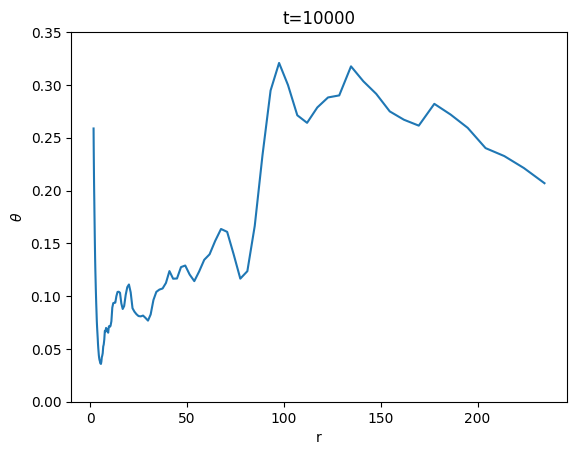

In [12]:
T1=[]
T2=[]
for dirname in ["outputs-s=0.15-q=0.5"]:
    theta1=np.zeros((tmax+1,rmax-1))
    theta2=np.zeros((tmax+1,rmax-1))

    for num in range(tmin,tmax+1):
        print(num)
        theta_1,theta_2=read(dirname,num)
        theta1[num]=theta_1
        theta2[num]=theta_2

    theta1_a=theta1[tmin:tmax+1,:].mean(axis=0)
    theta2_a=theta2[tmin:tmax+1,:].mean(axis=0)
    T1.append(theta1_a)
    T2.append(theta2_a)

In [5]:

prim_file_path = dirname + "/my_torus.prim.00000.athdf"
prim_data = athena_read.athdf(prim_file_path)

In [28]:
# 删除T1的第三个
# 删除T2的第三个

T1.pop(2)
T2.pop(2)

array([1.62441569, 1.62442981, 1.6244863 , 1.62452397, 1.62457732,
       1.62460714, 1.62459144, 1.62454594, 1.62454123, 1.62453495,
       1.6245679 , 1.62459615, 1.62463381, 1.62456477, 1.62454594,
       1.62438901, 1.62426347, 1.62405006, 1.62386332, 1.62368129,
       1.62348357, 1.62321209, 1.62305674, 1.62286372, 1.62284489,
       1.62261421, 1.62246043, 1.62232391, 1.62222191, 1.62210892,
       1.62208224, 1.62206812, 1.62213089, 1.62208381, 1.62195827,
       1.6216664 , 1.6212584 , 1.62061187, 1.6199936 , 1.61971427,
       1.62035923, 1.62326701, 1.6278476 , 1.63406959, 1.64115624,
       1.64872934, 1.65659276, 1.66207565, 1.66929411, 1.67381192,
       1.67846312, 1.683447  , 1.68878709, 1.69621896, 1.70527342,
       1.71523804, 1.7231752 , 1.72747333, 1.72876637, 1.73055216,
       1.74175175, 1.75781283, 1.78810839, 1.80552371, 1.82395589,
       1.8216397 , 1.80787598, 1.78317159, 1.75073403, 1.72314382,
       1.69094792, 1.69978426, 1.71199915, 1.69838293, 1.65699

Text(0.5, 1.0, '$\\overline{\\theta}$ at t=8000~10000')

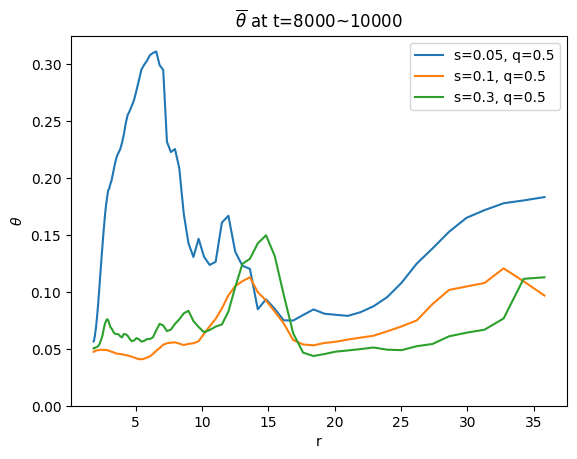

In [36]:

for i in range(3):
    plt.plot(prim_data["x1v"][1:rmax],(T2[i]-T1[i])/2,label= ["s=0.05, q=0.5","s=0.1, q=0.5","s=0.3, q=0.5", "s=0.15, q=0.5"][i])
    # plt.subplot(2,2,i+1)
    # plt.plot(prim_data["x1v"][1:rmax],(T2[i]-T1[i])/2,label=r"$\theta$")
    # # y轴从0开始，最大不限制
    # plt.ylim(0, None)
    # # plt.xlabel("r")
    # # plt.ylabel(r"$\theta$")
# 回到主图
plt.legend()
plt.ylim(0, None)
plt.xlabel("r")
plt.ylabel(r"$\theta$")
# 最上面的标题

plt.title(r"$\overline{\theta}$ at t=%d~%d" % (tmin*timestep,tmax*timestep))

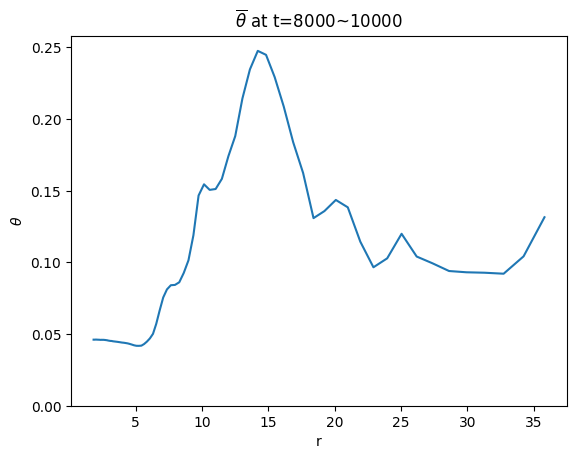

In [6]:
plt.clf()
# plt.plot(prim_data["x1v"][1:rmax],theta1_a,label=r"$\theta_-$")
# plt.plot(prim_data["x1v"][1:rmax],theta2_a,label=r"$\theta_+$")
plt.plot(prim_data["x1v"][1:rmax],(theta2_a-theta1_a)/2,label=r"$\theta$")
# y轴从0开始，最大不限制
plt.ylim(0, 0.35)
plt.xlabel("r")
plt.ylabel(r"$\theta$")
plt.title(r"$\overline{\theta}$ at t=%d~%d" % (tmin*timestep,tmax*timestep))
# plt.legend()
plt.savefig(dirname+"/theta.mean.png")